<a href="https://colab.research.google.com/github/BaoFrancisNguyen/IA/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importation des librairies**

In [3]:
# Traitement et manipulation des données
import pandas as pd
import numpy as np

    # Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

    # Modélisation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #notre modele
from sklearn.metrics import classification_report, confusion_matrix

**Recupération et lecture du fichier .CSV**

In [69]:
import pandas as pd

  #Lien direct de téléchargement
url = "https://drive.google.com/uc?export=download&id=1TzUbV-Ad0LlZ-oXvlRoT0gUPKtb0UP7X"

    # Charger les données
df = pd.read_csv(url, sep="\t")

    # Aperçu des données"
pd.set_option('display.max_columns', None)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsP

**Nettoyage des données**

In [73]:
# Enlever les espaces des colonnes
df.columns = df.columns.str.strip()
  # ou
 #for x in df.columns:
    #df.rename(columns={x: x.strip()}, inplace=True)

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
colonnes_vides = df.isnull().sum()
print(colonnes_vides[colonnes_vides > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes


Income    24
dtype: int64


In [6]:

# pour remplacer les éléments vides par la moyenne
#moyenne_income = df['Income'].mean()
     #df['Income'] = df['Income'].fillna(moyenne_income)

# pour supprimer les lignes n'ayant pas de données dans la colonne "Income"
df = df.dropna(subset=['Income'])


In [7]:
#identifier les doublons
doublons = df.duplicated()
print(doublons.sum())
 #si doublons, utiliser df.drop_duplicates()

0


In [8]:
# supprimer la colonne 'ID'
df = df.drop('ID', axis=1)
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0     04-09-2012       58

In [9]:
valeurs_uniques = df['Marital_Status'].unique()
print(valeurs_uniques)


['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [10]:
comptage_valeurs = df['Marital_Status'].value_counts()
print(comptage_valeurs)


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [84]:
# Supprimer toutes les occurrences de 'Absurd' et 'Yolo'dans la colonne 'Marital_Status'
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'YOLO']


print(df['Marital_Status'].value_counts())


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: count, dtype: int64


Encodage des données de **catégories**
en booléen, des nouvelles colonnes sont crées

In [86]:

# Liste des colonnes à encoder
categorical_columns = ['Education', 'Marital_Status']

# Appliquer le one-hot encoding et ajouter les colonnes au DataFrame
df_categories_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

# Afficher le résultat
print(df_categories_encoded)


         ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524        1957  58138.0        0         0  04-09-2012       58   
1      2174        1954  46344.0        1         1  08-03-2014       38   
2      4141        1965  71613.0        0         0  21-08-2013       26   
3      6182        1984  26646.0        1         0  10-02-2014       26   
4      5324        1981  58293.0        1         0  19-01-2014       94   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10870        1967  61223.0        0         1  13-06-2013       46   
2236   4001        1946  64014.0        2         1  10-06-2014       56   
2237   7270        1981  56981.0        0         0  25-01-2014       91   
2238   8235        1956  69245.0        0         1  24-01-2014        8   
2239   9405        1954  52869.0        1         1  15-10-2012       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0     

**distribution des valeurs d'une colonne**

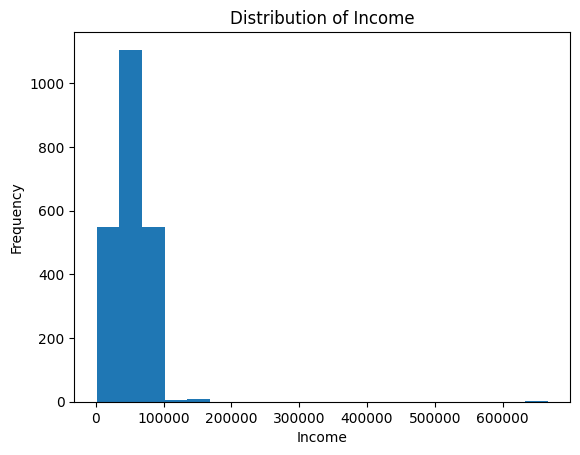

In [74]:
plt.hist(df['Income'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

In [38]:
print(df.isnull().sum())  # vérifier si on compte des NaN

Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Education_Label         0
Marital_Status_Label    0
dtype: int64


In [39]:
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation          Alone  58138.0        0         0   
1           1954  Graduation          Alone  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD       Together  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation       Together  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation          Alone  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD       Together  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
0     04-09-2012       58     

In [16]:

df['Marital_Status'] = df['Marital_Status'].replace('Married', 'Together')
df['Marital_Status'] = df['Marital_Status'].replace('Divorced', 'Alone')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Alone')
df['Marital_Status'] = df['Marital_Status'].replace('Single', 'Alone')
print(df['Marital_Status'].value_counts())

Marital_Status
Together    1430
Alone        782
Name: count, dtype: int64


**Standardisation des données**

In [79]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Exemple de DataFrame avec les colonnes nécessaires


# Sélection des colonnes numériques
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                  'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue','Response']

# Sélection des colonnes catégoriques
categorical_cols = ['Dt_Customer', 'Complain', 'Education', 'Marital_Status']

# Sélectionner les colonnes numériques pour la standardisation
X = df[numerical_cols]

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation
X_scaled = scaler.fit_transform(X)

# Convertir les données standardisées en DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Concaténer les colonnes standardisées avec les variables catégoriques
df_standardized = pd.concat([X_scaled_df, df[categorical_cols]], axis=1)

# Vérification du résultat
print(df_standardized.head())



     Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.234063 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1 -0.234559  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2  0.769478 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3 -1.017239  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4  0.240221  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.679702         2.462147          1.476500      0.843207   
1        -0.713225        -0.650449         -0.631503     -0.729006   
2        -0.177032         1.345274         -0.146905     -0.038766   
3        -0.651187        -0.503974         -0.583043     -0.748179   
4        -0.216914         0.155164         -0.001525     -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.349414         1.409304             2.510890          -0.550785   
1          -0.

**Matrice des corrélations**
Importante pour déterminer les colonnes pertinentes pour l'entrainement du modèle.

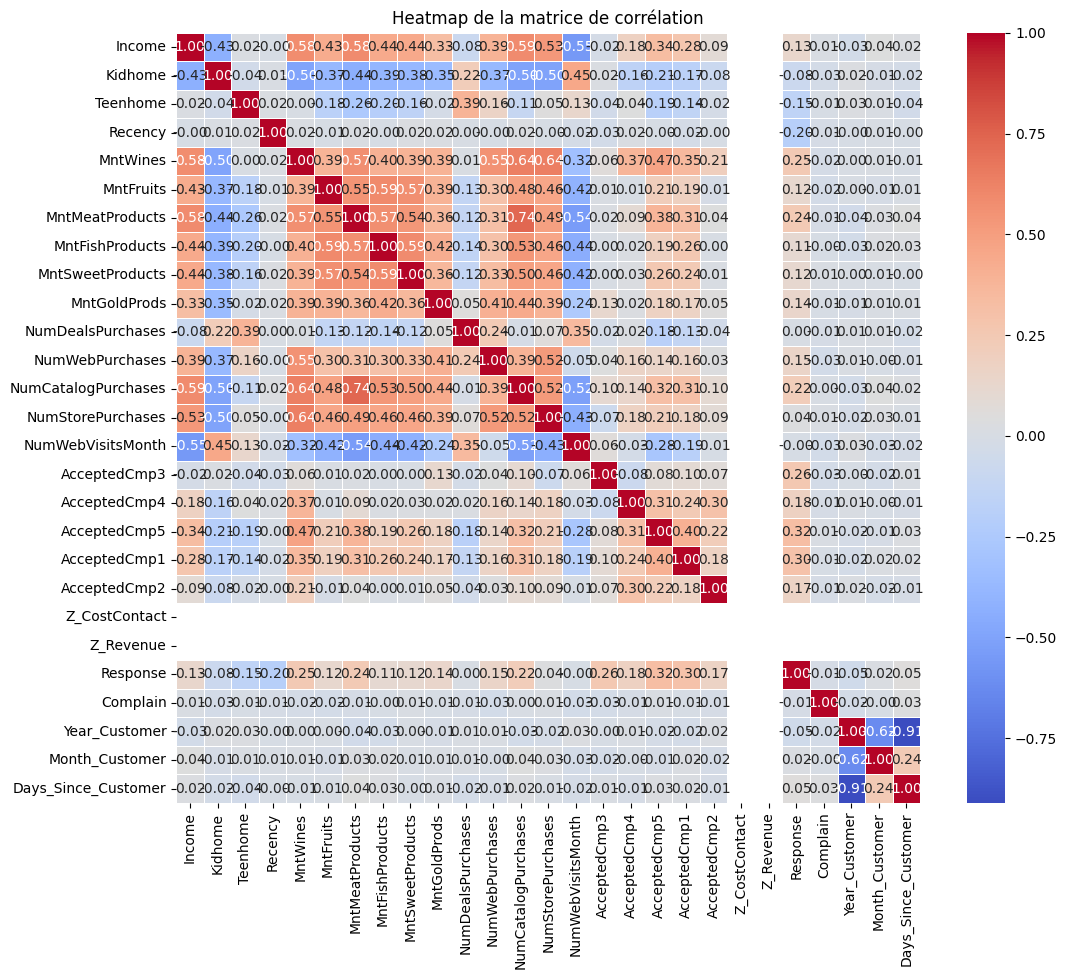

In [78]:
data_heatmap = pd.DataFrame(df_standardized)  # Convert the dictionary to DataFrame

# selectionner les dtypes dans la DataFrame
numeric_columns = data_heatmap.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_heatmap[numeric_columns].corr()

#  Visualiser avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de la matrice de corrélation')
plt.show()

In [88]:
import pandas as pd

# Conversion en datetime
df_standardized["Dt_Customer"] = pd.to_datetime(df_standardized["Dt_Customer"], format="%d-%m-%Y")

# Extraire l'année et le mois (ou tout autre paramètre pertinent)
df_standardized["Year_Customer"] = df_standardized["Dt_Customer"].dt.year
df_standardized["Month_Customer"] = df_standardized["Dt_Customer"].dt.month

# Option : Nombre de jours écoulés depuis une date de référence
df_standardized["Days_Since_Customer"] = (pd.to_datetime("2024-01-01") - df_standardized["Dt_Customer"]).dt.days


In [89]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques à standardiser
num_cols = ["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
            "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
            "Year_Customer", "Month_Customer", "Days_Since_Customer"]

scaler = StandardScaler()
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Séparer les caractéristiques et la cible
X = df_standardized.drop(columns=["Response", "Dt_Customer"])  # Supprimer aussi Dt_Customer transformé
y = df_standardized["Response"]

# Handle missing values in the target variable (y) using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Remplace les NaN par des valeurs les plus fréquentes
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Redimmensionnement pour SimpleImputer et compatibilité
y_imputed = y_imputed.astype(int)

y = y_imputed.ravel()

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


**Entrainement du modèle**

In [96]:


# One-Hot Encoding sur X_train et X_test
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Aligner les colonnes si nécessaire
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)



In [97]:
print(X_train.dtypes)


Income                     float64
Kidhome                    float64
Teenhome                   float64
Recency                    float64
MntWines                   float64
MntFruits                  float64
MntMeatProducts            float64
MntFishProducts            float64
MntSweetProducts           float64
MntGoldProds               float64
NumDealsPurchases          float64
NumWebPurchases            float64
NumCatalogPurchases        float64
NumStorePurchases          float64
NumWebVisitsMonth          float64
AcceptedCmp3               float64
AcceptedCmp4               float64
AcceptedCmp5               float64
AcceptedCmp1               float64
AcceptedCmp2               float64
Z_CostContact              float64
Z_Revenue                  float64
Complain                     int64
Year_Customer              float64
Month_Customer             float64
Days_Since_Customer        float64
Education_2n Cycle            bool
Education_Basic               bool
Education_Graduation

In [59]:
print(X_train.dtypes)

Income       float64
Kidhome        int64
Teenhome       int64
Recency      float64
MntWines     float64
MntFruits    float64
dtype: object


In [60]:
# S'assurer que les colonnes correspondent entre X_train et X_test
#One-Hot Encoding, il peut arriver que X_train et X_test aient des colonnes différentes. Harmonisez-les comme suit :
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test = X_test.fillna(0)  # Remplace les colonnes manquantes par 0


In [98]:
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.8883928571428571
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       396
           2       0.54      0.27      0.36        52

    accuracy                           0.89       448
   macro avg       0.72      0.62      0.65       448
weighted avg       0.87      0.89      0.87       448



In [102]:
import numpy as np
print("Valeurs uniques dans y_train :", np.unique(y_train))
print("Valeurs uniques dans y_test :", np.unique(y_test))



Valeurs uniques dans y_train : [0 2]
Valeurs uniques dans y_test : [0 2]


In [105]:
import numpy as np
# Normaliser les classes en 0 et 1
y_train = np.where(y_train == 2, 1, y_train) #If y_train value is 2, replace with 1, else keep original value.
y_test = np.where(y_test == 2, 1, y_test) #If y_test value is 2, replace with 1, else keep original value.

# Vérifier les valeurs uniques après normalisation
print("Valeurs uniques dans y_train :", np.unique(y_train))
print("Valeurs uniques dans y_test :", np.unique(y_test))




Valeurs uniques dans y_train : [0 1]
Valeurs uniques dans y_test : [0 1]


In [108]:
model = RandomForestClassifier(random_state=13)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.8973214285714286
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       396
           1       0.61      0.33      0.42        52

    accuracy                           0.90       448
   macro avg       0.76      0.65      0.68       448
weighted avg       0.88      0.90      0.88       448



In [65]:
# Prédiction avec un seuil ajusté (par exemple, 0.3 au lieu de 0.5)
y_pred = (model.predict_proba(X_test)[:, 1] > 0.3).astype(int)


In [111]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = (model.predict_proba(X_test)[:, 1] > 0.3677).astype(int) # Prédiction avec un seuil ajusté

from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.9084821428571429
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       396
           1       0.61      0.60      0.60        52

    accuracy                           0.91       448
   macro avg       0.78      0.77      0.78       448
weighted avg       0.91      0.91      0.91       448



Séparation des données